# Combines models from Julia and Lukas

In [1]:
from copy import deepcopy
import yaml
from pathlib import Path
import torch
import shutil
import matplotlib.pyplot as plt
import h5py
from networks.losses import PhysicalLossV2, PhysicalLossV1
from utils.visualization import prepare_data_to_plot, plot_datafields, DataToVisualize
import numpy as np

%reload_ext autoreload
%autoreload 2

/home/pillerls/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_name = "dataset_medium_k_3e-10_1000dp"
shape = (1280, 64)
with open("paths.yaml", "r") as paths:
    paths = yaml.safe_load(paths)
    path = paths["default_raw_dir"] + "/" + dataset_name + "/"
loss = PhysicalLossV2("cpu")

settings_pic = {"format": "png",
                "dpi": 600,}

In [5]:
for i in [1]:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file[list(file.keys())[-1]]
    temp_pred = torch.tensor(dp['Temperature [C]']).float().reshape(shape)[180:220]
    temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape)[180:320]
    press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape)[180:320]
    perm = torch.tensor(dp['Permeability X [m^2]']).float().reshape(shape)[180:320]
    
    temp_max = temp.max()
    temp_min = temp.min()

    extent_highs = (np.array([5, 5]) * temp.shape[-2:])

    PhysicalLoss = PhysicalLossV1("cpu")
    energy_residual_true_orig = PhysicalLoss.get_energy_error(temp.unsqueeze(0), press.unsqueeze(0), perm.unsqueeze(0), 5).squeeze()
    cont_residual_true_orig = PhysicalLoss.get_continuity_error(temp.unsqueeze(0), press.unsqueeze(0), perm.unsqueeze(0), 5).squeeze()
    

    dict_to_plot = {
        "t_predict": DataToVisualize(temp_pred, "Temperature in [°C]", extent_highs, {"vmax": 10.6, "vmin": temp_min}),
        "t_true": DataToVisualize(temp, "Temperature in [°C]", extent_highs, {"vmax": 10.6, "vmin": temp_min}),
        "energy_residual_true_orig": DataToVisualize(energy_residual_true_orig, "Energy residual      ", extent_highs),
        "cont_residual_true_orig": DataToVisualize(cont_residual_true_orig, "Continuity residual      ", extent_highs),
    }
    plot_datafields(dict_to_plot, str(i) + "not_steady_state", settings_pic)
    plt.close("all")

Datapoint: 1


In [3]:
dataset_name = "plume_extension_training"
points = range(1, 2)
shape = (1280, 64)
with open("paths.yaml", "r") as paths:
    paths = yaml.safe_load(paths)
    path = paths["default_raw_dir"] + "/" + dataset_name + "/"
loss = PhysicalLossV2("cpu")

settings_pic = {"format": "png",
                "dpi": 600,}

lower = 150
upper = 750

In [4]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp_start = file[list(file.keys())[0]]
    temp_start = torch.tensor(dp_start['Temperature [C]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    press_start = torch.tensor(dp_start['Liquid Pressure [Pa]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    perm_start = torch.tensor(dp_start['Permeability X [m^2]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    darcy_x_start, darcy_y_start = loss.get_darcy(temp_start, press_start, perm_start, 5.0)

    dp_end = file[list(file.keys())[-1]]
    temp_end = torch.tensor(dp_end['Temperature [C]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    press_end = torch.tensor(dp_end['Liquid Pressure [Pa]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    perm_end = torch.tensor(dp_end['Permeability X [m^2]']).float().reshape(shape)[lower:upper].unsqueeze(0)
    darcy_x_end, darcy_y_end = loss.get_darcy(temp_end, press_end, perm_end, 5.0)

    temp_max = max(temp_start.max(), temp_end.max())
    temp_min = min(temp_start.min(), temp_end.min())

    extent_highs = (np.array([5, 5]) * temp_end.shape[-2:])

    dict_to_plot = {
        "t_true": DataToVisualize(temp_end.squeeze(), "Temperature in [°C]", extent_highs, {"vmax": 10.6, "vmin": temp_min}),
        "darcy_y_end": DataToVisualize(darcy_y_end.squeeze(), "Flow in x-direction at steady state     ", extent_highs),
        "darcy_x_start": DataToVisualize(darcy_x_start.squeeze(), "Flow in y-direction before HP     ", extent_highs),
        "darcy_x_end": DataToVisualize(darcy_x_end.squeeze(), "Flow in y-direction at steady state     ", extent_highs),
    }
    print(darcy_x_end.min())
    plot_datafields(dict_to_plot, str(i) + "darcy_flow", settings_pic)
    plt.close("all")
    
    # plot darcy x, darcy y, temp

Datapoint: 1
tensor(1.3754e-06)


ValueError: Position accepts only [ 'left' | 'right' ]

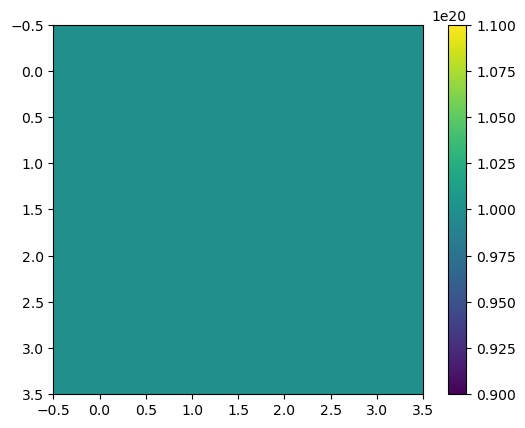

In [67]:
# Create example data with large values
x = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7]]) + 1e20

# Plot the data with a colorbar
plt.imshow(x)
cbar = plt.colorbar()

cbar.ax.yaxis.set_offset_position('below')

# Adjust the position of the colorbar below the plot


plt.show()
